In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Probability

In [2]:
dna1 = str(np.load('dna1.npy'))
dna2 = str(np.load('dna2.npy'))

### Question 1.1

In [3]:
#define a function that reports the probability of finding a base (b) in a sequence (seq)
def base_prob(seq, b, seq_name):
    i = 0
    for n in seq:
        if n == b:
            i += 1
    prob = i/len(seq)
    print ("The probability of finding {} in {} is {}".format(b, seq_name, prob))

In [4]:
#call probability reporter for each base and each sequence
bases = "ACTG"
for base in bases:
    base_prob(dna1, base, "dna1")
print()
for base in bases:
    base_prob(dna2, base, "dna2")

The probability of finding A in dna1 is 0.308125
The probability of finding C in dna1 is 0.223625
The probability of finding T in dna1 is 0.29925
The probability of finding G in dna1 is 0.169

The probability of finding A in dna2 is 0.30875
The probability of finding C in dna2 is 0.217
The probability of finding T in dna2 is 0.3105
The probability of finding G in dna2 is 0.16375


### Question 1.2

In [5]:
#define a function that reports the probability of finding a fragment(f) in a sequence (seq)
def base_prob2(seq, f, seq_name):
    exp = len(seq)/4**len(f)
    i = 0
    c = 0
    #test every position of the sequence
    for n in range(len(seq)):
        #doesnt matter the number of bases being surveyed because this adapts to f's length
        if seq[c:c+len(f)] == f:
            i += 1
        c += 1
    prob = i/len(seq)
    print ("The probability of finding '{}' in {} is {}".format(f, seq_name, prob))

In [6]:
#define fragment to search for
fragment = "TTTT"

#search for fragment's sequence in each 
base_prob2(dna1, fragment, "dna1")
base_prob2(dna2, fragment, "dna2")

The probability of finding 'TTTT' in dna1 is 0.009875
The probability of finding 'TTTT' in dna2 is 0.02775


Considering that the probability of finding a given sequence of base pairs in another random sequence (each base is independent from the rest of the sequence) is $(1/4)^n$, where n is the given sequence's length, the probability of finding a 4-base long sequence (in this case TTTT) would be $(1/4)^4$, or 0.00390625. This probability is closer to the one found in dna1, so this must be the synthetic sequence and dna2 must be the natural one.

## Entropy

### Question 2.1

In [7]:
#calculate the entropy of a variable given its probability distribution
#pd is a list of probabilities for each state of a variable
def entropy(pd):
    total = 0
    for n in pd:
        if n != 0:
            total -= n*np.log2(n)
    return total

### Question 2.2

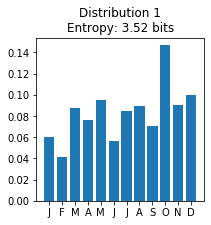

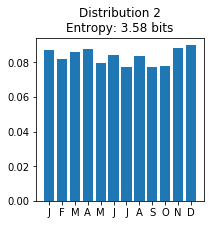

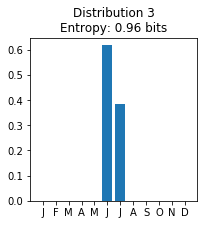

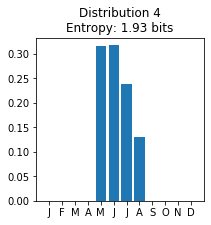

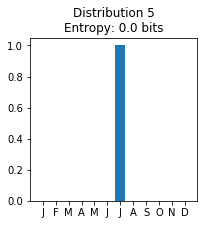

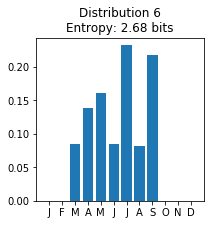

In [8]:
d1= np.load('annualprobs.npy')

#set the x-axis labels for figures
months = ["J", "F", "M", "A", "M", "J", "J", "A", "S", "O", "N", "D"]
x_axis = np.linspace(0, len(months)-1, len(months))

#for each distribution (dist) 1 to 6, calculate its entropy and plot it
for dist in range(len(d1)):
    #rounding entropy values to 2 decimal places
    ent = round(entropy(d1[dist]), 2)
    plt.figure(figsize = (3,3))
    plt.title("Distribution {}\nEntropy: {} bits".format(dist+1, ent))
    plt.bar(x_axis, d1[dist])
    plt.xticks(x_axis, months)
    plt.show()

The entropy seems to be higher if the probabilities are similar for each state of the distribution, as best represented in Distribution 2 (with the highest entropy). 
<br>
If there is a strong bias to one or some of the states (probability is concentrated in a few states), as in Distributions 5 or 3, respectively, the entropy is lower. This makes sense with the definition of entropy as "a measure of how disorganized something is". 

## Measuring the dependance between two random variables

In [9]:
d2 = np.load('XandY.npy')

## Question 3.1

In [10]:
def correlation(x, y):
    #get means for each list
    mx = np.mean(x)
    my = np.mean(y)
    
    #variables to store each sum in the correlation
    sum_x2 = 0
    sum_y2 = 0
    sum_xy = 0
    
    #get values for every sum
    for n in x:
        sum_x2 += (n - mx)**2
    for n in y:
        sum_y2 += (n - my)**2
    for c in range(len(x)): #x and y need to have the same amount of elements
        sum_xy += (x[c] - mx) * (y[c] - my)
    
    #return the final calculation of the correlation
    return sum_xy/(sum_x2*sum_y2)**(1/2)

## Question 3.2

Plotting for every dataset instead of just one

Dataset 1


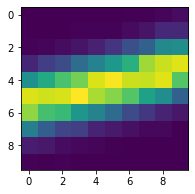

Dataset 2


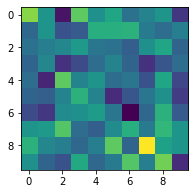

Dataset 3


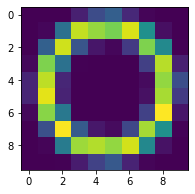

Dataset 4


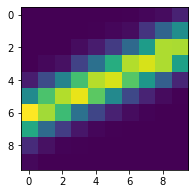

In [11]:
for set in range(0, len(d2), 2):
    hist, xedges, yedges = np.histogram2d(d2[set], d2[set+1], bins = 10)
    hist = np.rot90(hist)
    print("Dataset", int(1+set/2))
    plt.figure(figsize = (3,3))
    plt.imshow(hist, aspect = 'auto')
    plt.show()

## Question 3.3

The number of events is the length of each dataset. 
<br>
The probability that an event falls into a bin should then be equal to the number of events in that bin divided by the total number of events

In [12]:
#this function returns the mutual information between x and y, normalized by the entropy of y
def normalized_mutual_information(x, y):
    hist, xedges, yedges = np.histogram2d(x, y, bins = 10)
    hist_norm = hist/np.sum(hist) #normalize the histogram to get the bins probability distribution
    
    #calculate conditional entropy of y given x
    cond_ent = 0
    for x_val in hist_norm:
        x_prob = np.sum(x_val)
        for y_val in x_val:
            if y_val != 0:
                cond_ent += y_val*np.log2(x_prob/y_val)
    
    #calculate y entropy and normalized mutual information
    y_probs = np.sum(hist_norm, axis = 0)
    y_ent = entropy(y_probs)
    nmi = (y_ent-cond_ent)/y_ent
    
    return nmi

In [13]:
#approximating final results to 2 decimal points
cor = round(correlation(d2[0], d2[1]), 2)
nmi = round(normalized_mutual_information(d2[0], d2[1]), 2)
print("Dataset 1")
print("Correlation:", cor)
print("Normalized Mutual Information:", nmi)

Dataset 1
Correlation: 0.52
Normalized Mutual Information: 0.09


## Question 3.4

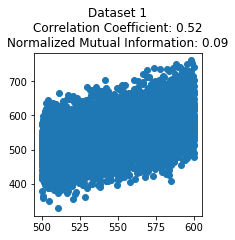

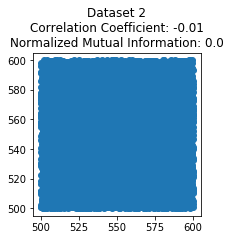

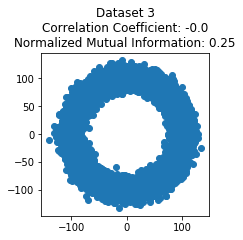

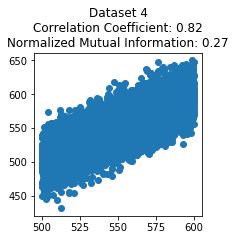

In [14]:
for set in range(0, len(d2), 2):
    #approximating final results to 2 decimal points
    cor = round(correlation(d2[set], d2[set+1]), 2)
    nmi = round(normalized_mutual_information(d2[set], d2[set+1]), 2)
    plt.figure(figsize = (3,3))
    plt.scatter(d2[set], d2[set+1])
    plt.title("Dataset {}\nCorrelation Coefficient: {}\nNormalized Mutual Information: {}"
             .format(int(1+set/2), cor, nmi))
    plt.show()

While correlation and mutual information have some measure of dependance between x and y, they behave differently.
<br><br>
Correlation appears to be high only if x and y change together in a linearly, as seen in datasets 1 and 4. As there is no linear correlation between x and y in datasets 2 and 3, the correlation coefficient nears 0. Correlation is ultimately a measure of how much x changes along with y, asking the question "if x is high (compared to its mean), will y be high/low too?". It can be seen how this applies for dataset 4 and not for dataset 3.
<br><br>
The normalized mutual information, in the other hand, still has distinguishable values for datasets 1 and 4, but now also for dataset 3. Visually, dataset 3 seems relatively "organized". We can know a lot about y if we know x, even if they do not correlate linearly, and that is why the normalized mutual information nears the one seen in dataset 4. As the probabilities are still concentrated in a few positions of the probability-space, the entropy is reduced if we know the values for x. For example, if we know that x is a middle-value in dataset 3, we would certainly know that y would have an extreme value.